In [1]:
import math
from copy import deepcopy
from typing import List, Tuple

import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

from src.models.geometric_figure import GeometricFigure
from src.services.geometric_figure import (get_geometric_figures,
                                           plot_geometric_figures,
                                           prediction_to_category)

In [2]:
IMAGE_SIZE = (512, 512)
DATA_VERSION = '2023-03-22'

In [3]:
geometric_figures: List[GeometricFigure] = get_geometric_figures(f'data/{DATA_VERSION}', IMAGE_SIZE, memorize=True)
print(f'Loaded {len(geometric_figures)} geometric figures')

Loaded 300 geometric figures


In [4]:
model = keras.models.load_model('data/geometric_figure_classifier.h5')

In [5]:
geometric_figures_error_predictions: List[Tuple[GeometricFigure, str]] = []
geometric_figures_array = np.array([gf['image'] for gf in geometric_figures])
predictions = model.predict(geometric_figures_array)
for i, prediction in enumerate(predictions):
    if prediction_to_category(prediction) != geometric_figures[i]['category']:
        geometric_figures_error_predictions.append((geometric_figures[i], prediction_to_category(prediction)))
print(f'Predicted {len(geometric_figures_error_predictions)} geometric figures with error')

Predicted 9 geometric figures with error


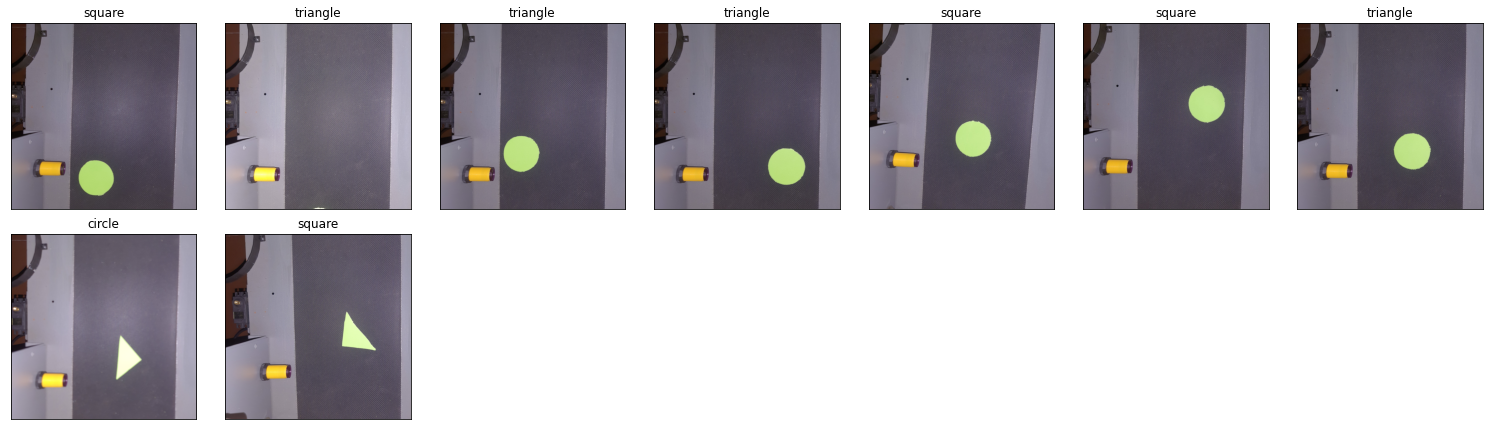

In [6]:
plot_size = 3
columns = 7
rows = math.ceil(len(geometric_figures_error_predictions)/columns)
geometric_figures: List[GeometricFigure] = []
for gf, prediction in geometric_figures_error_predictions:
    new_gf = deepcopy(gf)
    new_gf['category'] = prediction
    geometric_figures.append(new_gf)
plot_geometric_figures(geometric_figures, columns, plot_size)
plt.show()